<div class="alert alert-block alert-info">
<b><span style="font-family:Comic Sans MS">The Arbitrage Pricing Theory</span></b>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [9]:
stocks = ['AAPL','MSFT','AMZN']
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2021,1,3)
stock_prices = yf.download(stocks,start=start,end = end, interval='3mo')
stock_prices.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                            Close                         \
                AAPL        AMZN       MSFT      AAPL        AMZN       MSFT   
Date                                                                           
2009-12-01  6.294721  118.400002  22.278278  7.307857  118.400002  28.670000   
2010-02-16       NaN         NaN        NaN       NaN         NaN        NaN   
2010-03-01  7.902396  125.459999  20.141876  9.174286  125.459999  25.799999   
2010-05-18       NaN         NaN        NaN       NaN         NaN        NaN   
2010-06-01  7.478480  124.830002  18.405535  8.682143  124.830002  23.469999   

                High                          Low                         \
                AAPL        AMZN   MSFT      AAPL        AMZN       MSFT   
Date                                                                       
2009-12-01  7.699643  136.610001  31.24  6.794643  113.820000  27.570000   
2010-02-16       NaN         NaN    NaN       NaN         NaN        NaN   
2010-03-01  9.730714  151.089996  31.58  7.116071  117.519997  24.559999   
2010-05-18       NaN         NaN    NaN       NaN         NaN        NaN   
2010-06-01  9.964643  130.809998  26.93  8.412857  105.800003  22.730000   

                Open                               Volume               \
                AAPL        AMZN       MSFT          AAPL         AMZN   
Date                                                                     
2009-12-01  7.622500  136.250000  30.620001  2.594507e+10  441006800.0   
2010-02-16       NaN         NaN        NaN           NaN          NaN   
2010-03-01  7.348214  118.699997  28.770000  4.260396e+10  471977600.0   
2010-05-18       NaN         NaN        NaN           NaN          NaN   
2010-06-01  9.274643  124.970001  25.530001  4.191008e+10  422124500.0   

                          
                    MSFT  
Date                      
2009-12-01  2.434294e+09  
2010-02-16           NaN  
2010-03-01  4.149397e+09  
2010-05-18           NaN  
2010-06-01  4.359774e+09

In [10]:
stock_prices=stock_prices['Close']
stock_prices.dropna(inplace=True)
stock_prices.head(10)

,AAPL,AMZN,MSFT
Date,,,
2009-12-01,7.307857,118.400002,28.670000
2010-03-01,9.174286,125.459999,25.799999
2010-06-01,8.682143,124.830002,23.469999
2010-09-01,11.112500,175.399994,25.260000
2010-12-01,12.614643,173.289993,26.580000
2011-03-01,12.422500,196.690002,25.010000
2011-06-01,13.743929,215.229996,26.600000
2011-09-01,13.650000,192.289993,25.580000
2011-12-01,19.372856,179.690002,31.740000


In [11]:
stock_prices.describe()

,AAPL,AMZN,MSFT
count,45.000000,45.000000,45.000000
mean,36.624238,923.162222,73.168889
std,29.491878,902.134094,57.709746
min,7.307857,118.400002,23.469999
25%,18.794287,252.050003,30.820000
50%,27.629999,512.890015,47.810001
75%,43.767502,1629.619995,98.839996
max,131.960007,3450.959961,231.960007


In [12]:
stock_prices.tail()

,AAPL,AMZN,MSFT
Date,,,
2019-12-01,68.339996,1883.750000,162.009995
2020-03-01,79.485001,2442.370117,183.250000
2020-06-01,129.039993,3450.959961,225.529999
2020-09-01,119.050003,3168.040039,214.070007
2020-12-01,131.960007,3206.199951,231.960007


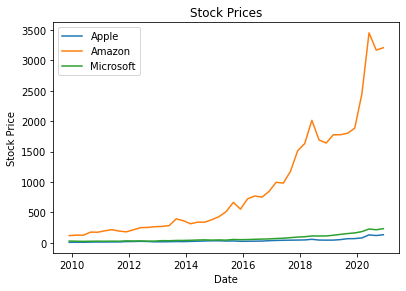

In [15]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(stock_prices.AAPL,label='Apple')
ax1.plot(stock_prices.AMZN,label='Amazon')
ax1.plot(stock_prices.MSFT,label='Microsoft')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.set_title('Stock Prices')
plt.legend()
plt.show()

In [16]:
returns=stock_prices.pct_change()
returns.dropna(inplace=True)
returns.head()

,AAPL,AMZN,MSFT
Date,,,
2010-03-01,0.255400,0.059628,-0.100105
2010-06-01,-0.053644,-0.005021,-0.090310
2010-09-01,0.279926,0.405111,0.076268
2010-12-01,0.135176,-0.012030,0.052257
2011-03-01,-0.015232,0.135034,-0.059067


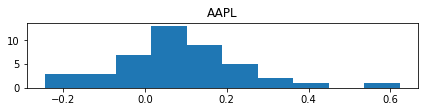

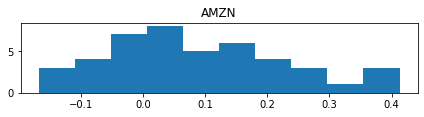

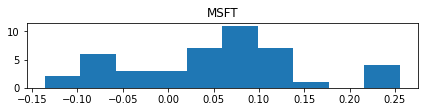

In [20]:
k=1
for i in range(0, len(returns.columns)):
    plt.subplot(3, 1, k)
    plt.hist(returns[returns.columns[i]])
    plt.title('{}'.format(returns.columns[i]))
    k+=1
    plt.tight_layout()
    plt.show()

__Correlation Analysis__

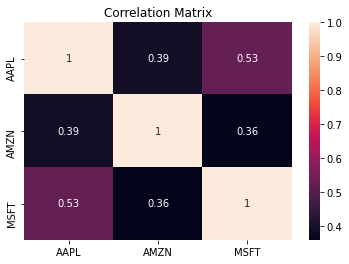

In [22]:
heat_corr=returns.corr()
sns.heatmap(heat_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

__collecting information on other macroeconomic variables__

In [24]:
# !pip install fredapi

In [26]:
from fredapi import Fred
fred = Fred(api_key='*******')

In [27]:
fred.search('risk free')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DGS10,DGS10,2021-03-22,2021-03-22,10-Year Treasury Constant Maturity Rate,1962-01-02,2021-03-18,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-03-19 15:22:15-05:00,100,For further information regarding treasury con...
GS10,GS10,2021-03-22,2021-03-22,10-Year Treasury Constant Maturity Rate,1953-04-01,2021-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-03-01 15:21:38-06:00,81,Averages of business days. For further informa...
WGS10YR,WGS10YR,2021-03-22,2021-03-22,10-Year Treasury Constant Maturity Rate,1962-01-05,2021-03-12,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-03-15 17:47:32-05:00,65,Averages of business days. For further informa...
DGS1,DGS1,2021-03-22,2021-03-22,1-Year Treasury Constant Maturity Rate,1962-01-02,2021-03-18,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-03-19 15:23:07-05:00,80,For further information regarding treasury con...
DGS30,DGS30,2021-03-22,2021-03-22,30-Year Treasury Constant Maturity Rate,1977-02-15,2021-03-18,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-03-19 15:22:13-05:00,80,Yields on actively traded non-inflation-indexe...
DGS5,DGS5,2021-03-22,2021-03-22,5-Year Treasury Constant Maturity Rate,1962-01-02,2021-03-18,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2021-03-19 15:23:02-05:00,79,For further information regarding treasury con...
GS1,GS1,2021-03-22,2021-03-22,1-Year Treasury Constant Maturity Rate,1953-04-01,2021-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-03-01 15:21:58-06:00,57,Averages of business days. For further informa...
WGS1YR,WGS1YR,2021-03-22,2021-03-22,1-Year Treasury Constant Maturity Rate,1962-01-05,2021-03-12,"Weekly, Ending Friday",W,Percent,%,Not Seasonally Adjusted,NSA,2021-03-15 17:47:29-05:00,55,Averages of business days. For further informa...
GS5,GS5,2021-03-22,2021-03-22,5-Year Treasury Constant Maturity Rate,1953-04-01,2021-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2021-03-01 15:22:03-06:00,60,Averages of business days. For further informa...


In [100]:
risk_free=pd.DataFrame(fred.get_series('GS3M'))
rf=risk_free/100
# Rename the column
rf.rename(columns = {0: 'rf'}, inplace = True)
# Set the Index
rf['Date']=rf.index
rf.reset_index(drop=True, inplace=True)
# Choose the data for the selected time frame
from datetime import datetime
rf2 = rf[(rf.Date >= datetime(2010, 1, 1)) &
         (rf.Date <= datetime(2021, 3, 1))]
rf2.head()

,rf,Date
340,0.0006,2010-01-01
341,0.0011,2010-02-01
342,0.0015,2010-03-01
343,0.0016,2010-04-01
344,0.0016,2010-05-01


In [109]:
risk_free.head()
# Rename the column
risk_free.rename(columns = {0: 'risk_free'}, inplace = True)
# Set the Index
risk_free['Date']=risk_free.index
risk_free.reset_index(drop=True, inplace=True)
# Choose the data for the selected time frame
from datetime import datetime
risk_free2 = risk_free[(risk_free.Date >= datetime(2010, 1, 1)) &
         (risk_free.Date <= datetime(2021, 3, 1))]
risk_free2.head()

,risk_free,Date
340,0.06,2010-01-01
341,0.11,2010-02-01
342,0.15,2010-03-01
343,0.16,2010-04-01
344,0.16,2010-05-01


In [110]:
risk_free2.set_index("Date", inplace = True)

In [101]:
rf2.set_index("Date", inplace = True)

In [102]:
rf2.head()

,rf
Date,
2010-01-01,0.0006
2010-02-01,0.0011
2010-03-01,0.0015
2010-04-01,0.0016
2010-05-01,0.0016


In [104]:
rf2=rf2.resample('Q').mean()*3

Text(0.5, 1.0, '3-Month Treasury Constant Maturity Rate')

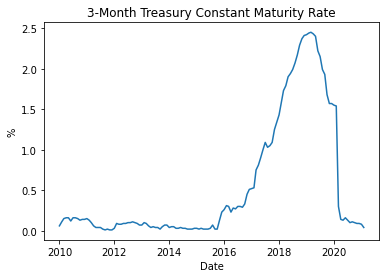

In [111]:
plt.plot(risk_free2)
# plt.plot(rf2)
plt.xlabel('Date')
plt.ylabel('%')
plt.title('3-Month Treasury Constant Maturity Rate')

__GDP__

In [116]:
gdp=pd.DataFrame(fred.get_series('GDP'))
# gdp=gdp['2010–01–01':'2021–03–22']
# gdp.tail()
gdp.head()
# Rename the column
gdp.rename(columns = {0: 'gdp'}, inplace = True)
# Set the Index
gdp['Date']=gdp.index
gdp.reset_index(drop=True, inplace=True)
# Choose the data for the selected time frame
from datetime import datetime
gdp2 = gdp[(gdp.Date >= datetime(2010, 1, 1)) &
         (gdp.Date <= datetime(2021, 3, 1))]
gdp2.head()

,gdp,Date
256,14721.350,2010-01-01
257,14926.098,2010-04-01
258,15079.917,2010-07-01
259,15240.843,2010-10-01
260,15285.828,2011-01-01


In [117]:
gdp2.set_index("Date", inplace = True)

In [118]:
gdp2.head()

,gdp
Date,
2010-01-01,14721.350
2010-04-01,14926.098
2010-07-01,15079.917
2010-10-01,15240.843
2011-01-01,15285.828


In [119]:
gdp_growth=gdp2.pct_change().dropna()

Text(0.5, 1.0, 'GDP Growth Rate, 2010–2021')

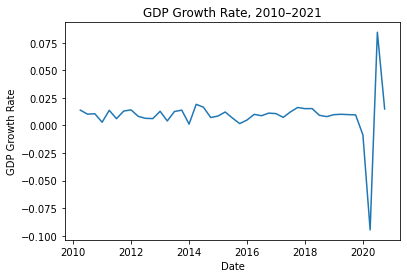

In [120]:
plt.plot(gdp_growth)
plt.ylabel('GDP Growth Rate')
plt.xlabel('Date')
plt.title('GDP Growth Rate, 2010–2021')

__Inflation__

In [122]:
# fred.search(‘potential inflation’)
inf=pd.DataFrame(fred.get_series('CPIEALL'))
# inf=inf[‘2009–12–01’:’2018–12–01']
inf.head()
# Rename the column
inf.rename(columns = {0: 'inflation'}, inplace = True)
# Set the Index
inf['Date']=inf.index
inf.reset_index(drop=True, inplace=True)
# Choose the data for the selected time frame
from datetime import datetime
inf2 = inf[(inf.Date >= datetime(2010, 1, 1)) &
         (inf.Date <= datetime(2021, 3, 1))]
inf2.head()

,inflation,Date
325,233.620,2010-01-01
326,233.758,2010-02-01
327,234.563,2010-03-01
328,234.932,2010-04-01
329,235.101,2010-05-01


In [124]:
inf2.set_index("Date", inplace = True)
inf2.head()

,inflation
Date,
2010-01-01,233.620
2010-02-01,233.758
2010-03-01,234.563
2010-04-01,234.932
2010-05-01,235.101


In [125]:
inf_quarterly=inf2.resample('Q').mean()
inf_growth=inf_quarterly.pct_change().dropna()
inf_growth.head()

,inflation
Date,
2010-06-30,0.004433
2010-09-30,0.000959
2010-12-31,0.002327
2011-03-31,0.011944
2011-06-30,0.015014


Text(0.5, 1.0, 'Inflation Growth Rate, 2010–2021')

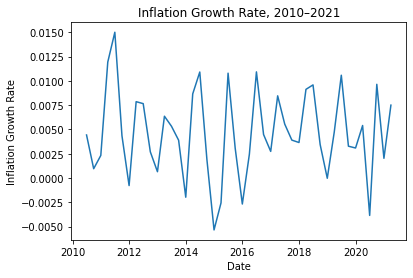

In [126]:
plt.plot(inf_growth)
plt.ylabel('Inflation Growth Rate')
plt.xlabel('Date')
plt.title('Inflation Growth Rate, 2010–2021')

__Oil Price__

In [130]:
import quandl
# # Get the data for Oil
oil = quandl.get("ODA/POILBRE_USD", start_date="2010-01-01", end_date="2021-03-01", api_key="aXWysdzLEVaSBAyCGKcx")

In [131]:
oil.head()

,Value
Date,
2010-01-31,76.412381
2010-02-28,74.312000
2010-03-31,79.274783
2010-04-30,84.928636
2010-05-31,76.250952


In [132]:
oil_quarterly=oil.resample('Q').mean()

In [133]:
oil_return=oil_quarterly.pct_change().dropna()
oil_return.head()

,Value
Date,
2010-06-30,0.026168
2010-09-30,-0.028821
2010-12-31,0.135982
2011-03-31,0.208562
2011-06-30,0.116544


Text(0.5, 1.0, 'Oil Return, 2010–2021')

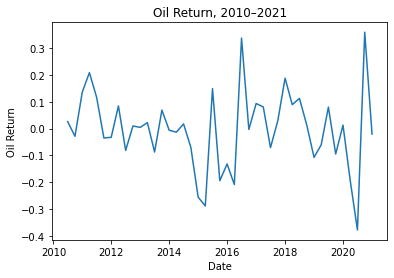

In [134]:
plt.plot(oil_return)
plt.ylabel('Oil Return')
plt.xlabel('Date')
plt.title('Oil Return, 2010–2021')

In [135]:
returns=returns.reset_index()
returns.drop('Date',axis=1,inplace=True)

In [139]:
rf2.head()

,index,Date,rf
0,0,2010-03-31,0.0032
1,1,2010-06-30,0.0044
2,2,2010-09-30,0.0047
3,3,2010-12-31,0.0041
4,4,2011-03-31,0.0038


In [140]:
returns.shape

(44, 3)

In [142]:
returns.tail()

,AAPL,AMZN,MSFT
39,0.022862,0.046063,0.070221
40,0.163082,0.296547,0.131103
41,0.623451,0.412955,0.230723
42,-0.077418,-0.081983,-0.050814
43,0.108442,0.012045,0.083571


In [141]:
rf2.shape

(45, 3)

In [143]:
rf2.tail()

,index,Date,rf
40,40,2020-03-31,0.0339
41,41,2020-06-30,0.0043
42,42,2020-09-30,0.0034
43,43,2020-12-31,0.0028
44,44,2021-03-31,0.0018


In [144]:
rf2.drop(rf2.tail(1).index,inplace=True)

In [146]:
rf2.tail()

,index,Date,rf
39,39,2019-12-31,0.0482
40,40,2020-03-31,0.0339
41,41,2020-06-30,0.0043
42,42,2020-09-30,0.0034
43,43,2020-12-31,0.0028


In [147]:
rf2=rf2.reset_index()
returns['rf']=rf2['rf']

In [148]:
returns.head()

,AAPL,AMZN,MSFT,rf
0,0.255400,0.059628,-0.100105,0.0032
1,-0.053644,-0.005021,-0.090310,0.0044
2,0.279926,0.405111,0.076268,0.0047
3,0.135176,-0.012030,0.052257,0.0041
4,-0.015232,0.135034,-0.059067,0.0038


In [150]:
stocks=['AAPL','AMZN','MSFT']
for i in stocks:
    returns['excess_return_'+str(i)]=returns[i]-returns.rf

In [151]:
returns.head(5)

,AAPL,AMZN,MSFT,rf,excess_return_AAPL,excess_return_AMZN,excess_return_MSFT
0,0.255400,0.059628,-0.100105,0.0032,0.252200,0.056428,-0.103305
1,-0.053644,-0.005021,-0.090310,0.0044,-0.058044,-0.009421,-0.094710
2,0.279926,0.405111,0.076268,0.0047,0.275226,0.400411,0.071568
3,0.135176,-0.012030,0.052257,0.0041,0.131076,-0.016130,0.048157
4,-0.015232,0.135034,-0.059067,0.0038,-0.019032,0.131234,-0.062867


In [153]:
gdp_growth.head()

,Date,gdp
0,2010-04-01,0.013908
1,2010-07-01,0.010305
2,2010-10-01,0.010672
3,2011-01-01,0.002952
4,2011-04-01,0.013762


In [156]:
# gdp_growth=gdp_growth.reset_index()
# inf_growth=inf_growth.reset_index()
# oil_return=oil_return.reset_index()

# gdp_growth.drop('Date',axis=1,inplace=True)
# inf_growth.drop('Date',axis=1,inplace=True)
# oil_return.drop('Date',axis=1,inplace=True)

# gdp_growth.columns=["gdp_growth"]
# inf_growth.columns=["inf_growth"]
# oil_return.columns=["oil_return"]

In [157]:
gdp_growth.head()

,level_0,index,gdp
0,0,0,0.013908
1,1,1,0.010305
2,2,2,0.010672
3,3,3,0.002952
4,4,4,0.013762


In [159]:
inf_growth.head()

,level_0,index,inflation
0,0,0,0.004433
1,1,1,0.000959
2,2,2,0.002327
3,3,3,0.011944
4,4,4,0.015014


In [161]:
oil_return.head()

,level_0,index,Value
0,0,0,0.026168
1,1,1,-0.028821
2,2,2,0.135982
3,3,3,0.208562
4,4,4,0.116544


In [163]:
gdp_growth['gdp_growth'] = gdp_growth['gdp']
inf_growth['inf_growth'] = inf_growth['inflation']
oil_return['oil_return'] = oil_return['Value']

In [164]:
print(gdp_growth.head())
print(inf_growth.head())
print(oil_return.head())

   level_0  index       gdp  gdp_growth
0        0      0  0.013908    0.013908
1        1      1  0.010305    0.010305
2        2      2  0.010672    0.010672
3        3      3  0.002952    0.002952
4        4      4  0.013762    0.013762
   level_0  index  inflation  inf_growth
0        0      0   0.004433    0.004433
1        1      1   0.000959    0.000959
2        2      2   0.002327    0.002327
3        3      3   0.011944    0.011944
4        4      4   0.015014    0.015014
   level_0  index     Value  oil_return
0        0      0  0.026168    0.026168
1        1      1 -0.028821   -0.028821
2        2      2  0.135982    0.135982
3        3      3  0.208562    0.208562
4        4      4  0.116544    0.116544


In [172]:
data1=pd.concat([gdp_growth['gdp_growth'], 
                 inf_growth['inf_growth'],
                 oil_return['oil_return'],
                 returns['excess_return_AAPL']],axis=1)
data2=pd.concat([gdp_growth['gdp_growth'], 
                 inf_growth['inf_growth'],
                 oil_return['oil_return'],
                 returns['excess_return_AMZN']],axis=1)
data3=pd.concat([gdp_growth['gdp_growth'], 
                 inf_growth['inf_growth'],
                 oil_return['oil_return'],
                 returns['excess_return_MSFT']],axis=1)

In [174]:
print(data1.head())
print(data2.head())
print(data3.head())

   gdp_growth  inf_growth  oil_return  excess_return_AAPL
0    0.013908    0.004433    0.026168            0.252200
1    0.010305    0.000959   -0.028821           -0.058044
2    0.010672    0.002327    0.135982            0.275226
3    0.002952    0.011944    0.208562            0.131076
4    0.013762    0.015014    0.116544           -0.019032
   gdp_growth  inf_growth  oil_return  excess_return_AMZN
0    0.013908    0.004433    0.026168            0.056428
1    0.010305    0.000959   -0.028821           -0.009421
2    0.010672    0.002327    0.135982            0.400411
3    0.002952    0.011944    0.208562           -0.016130
4    0.013762    0.015014    0.116544            0.131234
   gdp_growth  inf_growth  oil_return  excess_return_MSFT
0    0.013908    0.004433    0.026168           -0.103305
1    0.010305    0.000959   -0.028821           -0.094710
2    0.010672    0.002327    0.135982            0.071568
3    0.002952    0.011944    0.208562            0.048157
4    0.013762 

In [175]:
data1['excess_return']=returns.excess_return_AAPL
data2['excess_return']=returns.excess_return_AMZN
data3['excess_return']=returns.excess_return_MSFT

In [176]:
data1.head()

,gdp_growth,inf_growth,oil_return,excess_return_AAPL,excess_return
0,0.013908,0.004433,0.026168,0.252200,0.252200
1,0.010305,0.000959,-0.028821,-0.058044,-0.058044
2,0.010672,0.002327,0.135982,0.275226,0.275226
3,0.002952,0.011944,0.208562,0.131076,0.131076
4,0.013762,0.015014,0.116544,-0.019032,-0.019032


In [179]:
# import statsmodels.formula.api as smf
import statsmodels.api as smf
models = []
for i in (data1,data2,data3):
    formula =  "excess_return~ gdp_growth+inf_growth+oil_return"
    models.append(smf.OLS.from_formula(formula, data = i).fit())

In [180]:
models[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_return   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.120
Date:                Tue, 23 Mar 2021   Prob (F-statistic):              0.113
Time:                        00:01:46   Log-Likelihood:                 20.687
No. Observations:                  43   AIC:                            -33.37
Df Residuals:                      39   BIC:                            -26.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0855      0.044      1.936      0.060      -0.004       0.175
gdp_growth     1.0294      1.505      0.684      0.498      -2.015       4.074
inf_growth    -7.1093      7.189     -0.989      0.329     -21.650       7.431
oil_return     0.4208      0.264      1.596      0.119      -0.113       0.954
==============================================================================
Omnibus:                        0.780   Durbin-Watson:                   1.665
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.369
Skew:                           0.223   Prob(JB):                        0.832
Kurtosis:                       3.086   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
models[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_return   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     2.109
Date:                Tue, 23 Mar 2021   Prob (F-statistic):              0.115
Time:                        00:01:58   Log-Likelihood:                 23.276
No. Observations:                  43   AIC:                            -38.55
Df Residuals:                      39   BIC:                            -31.51
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1385      0.042      3.332      0.002       0.054       0.223
gdp_growth    -1.4277      1.417     -1.007      0.320      -4.294       1.439
inf_growth   -11.3856      6.769     -1.682      0.101     -25.076       2.305
oil_return     0.6169      0.248      2.485      0.017       0.115       1.119
==============================================================================
Omnibus:                        3.047   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                1.803
Skew:                           0.244   Prob(JB):                        0.406
Kurtosis:                       2.123   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
models[2].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_return   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.7696
Date:                Tue, 23 Mar 2021   Prob (F-statistic):              0.518
Time:                        00:02:19   Log-Likelihood:                 42.085
No. Observations:                  43   AIC:                            -76.17
Df Residuals:                      39   BIC:                            -69.13
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0524      0.027      1.952      0.058      -0.002       0.107
gdp_growth    -0.2914      0.915     -0.318      0.752      -2.142       1.560
inf_growth    -3.0982      4.371     -0.709      0.483     -11.938       5.742
oil_return     0.2214      0.160      1.381      0.175      -0.103       0.546
==============================================================================
Omnibus:                        3.871   Durbin-Watson:                   2.358
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                2.726
Skew:                           0.569   Prob(JB):                        0.256
Kurtosis:                       3.475   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""